# Tugas Eksperimen 2 - Pemrosesan Bahasa Alami <br>
Melakukan Text Classification pada dataset SMS. Data tersebut berisi pesan (SMS) dengan kategori (label kelas) spam dan ham (tidak spam). Metode klasifikasi yang digunakan yaitu Naive Bayes dan Logistic Regression.


Aditya Mahendra Zakaria - 1301184388<br>
Marcello Rasel Hidayatullah - 1301184019

## Import Libraries & Dataset

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
df = pd.read_csv('sms_spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# Mengubah nama kolom agar lebih mudah dimengerti
df.rename(columns={'Message':'Text'}, inplace=True)
df.rename(columns={'Category':'Label'}, inplace=True)

# Mengubah isi kolom label agar mudah dimengerti
df['Label'] = df['Label'].replace(['ham'],'non-spam')
df = df[['Text', 'Label']]
df.head()

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",non-spam
1,Ok lar... Joking wif u oni...,non-spam
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,non-spam
4,"Nah I don't think he goes to usf, he lives aro...",non-spam


## Data Exploration

In [33]:
# Mengecek jumlah data pada DataFrame
len(df)

5572

Terdapat 5572 sms beserta labelnya.

In [34]:
# Mengecek jumlah masing-masing label
df['Label'].value_counts()

non-spam    4825
spam         747
Name: Label, dtype: int64

Terdapat 4825 sms dengan label non-spam dan 747 sms dengan label spam.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


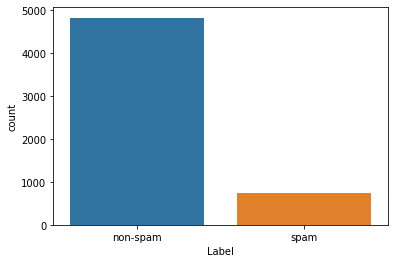

In [35]:
# Memvisualisasi jumlah label pada kolom 'Label' 
df_label = sns.countplot(df['Label'])
df_label.set_xticklabels(['non-spam','spam'])
plt.show()

In [36]:
# Mengecek missing values
df.isnull().sum()

Text     0
Label    0
dtype: int64

Tidak terdapat missing values pada dataset ini.

## Preprocessing<br>
Preprocessing yang dilakukan yaitu :<br>
1. Case Folding
2. Data Cleaning
3. Stop Word Removal
4. Lemmatization.

### Case Folding

In [37]:
# Case Folding
df['Text After Case Folding']= df['Text'].apply(lambda x: x.lower())
df = df[['Text', 'Text After Case Folding', 'Label']]
df.head()

,Text,Text After Case Folding,Label
0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",non-spam
1,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,non-spam
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,spam
3,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,non-spam
4,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",non-spam


### Data Cleaning

In [38]:
# Fungsi menghapus karakter spesial
def remove_special(text):
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  return text.replace("http://", " ").replace("https://", " ")

In [39]:
import string
string.punctuation

# Fungsi Remove Punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

def remove(text):
  hapus="".join([i for i in text if i not in string.punctuation])
  return hapus

In [40]:
# Fungsi menghapus karakter single
def remove_single(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

In [41]:
# Fungsi menghapus angka
def remove_number(text):
  return  re.sub(r"\d+", "", text)

In [42]:
# Fungsi menghapus whitespace
def remove_whitespace(text):
    return text.strip()

In [43]:
# Fungsi menghapus multiple whitespace
def remove_multiple(text):
    return re.sub('\s+',' ',text)

In [44]:
# Apply semua fungsi
df['Text After Cleaning'] = df['Text After Case Folding'].apply(remove_special)
df['Text After Cleaning'] = df['Text After Case Folding'].apply(remove_punctuation)
df['Text After Cleaning'] = df['Text After Case Folding'].apply(remove)
df['Text After Cleaning'] = df['Text After Case Folding'].apply(remove_single)
df['Text After Cleaning'] = df['Text After Case Folding'].apply(remove_number)
df['Text After Cleaning'] = df['Text After Case Folding'].apply(remove_whitespace)
df['Text After Cleaning'] = df['Text After Case Folding'].apply(remove_multiple)
df = df.drop(columns=['Text After Case Folding'])
df = df[['Text', 'Text After Cleaning', 'Label']]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Text,Text After Cleaning,Label
0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",non-spam
1,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,non-spam
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,spam
3,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,non-spam
4,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",non-spam


### Stop Word Removal

In [45]:
# Stop Word Removal
stop = stopwords.words('english')
df['Text After Stop Word'] = df['Text After Cleaning'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df = df.drop(columns=['Text After Cleaning'])
df = df[['Text', 'Text After Stop Word', 'Label']]
df.head()

,Text,Text After Stop Word,Label
0,"Go until jurong point, crazy.. Available only ...","go jurong point, crazy.. available bugis n gre...",non-spam
1,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,non-spam
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,U dun say so early hor... U c already then say...,u dun say early hor... u c already say...,non-spam
4,"Nah I don't think he goes to usf, he lives aro...","nah think goes usf, lives around though",non-spam


### Lemmatization

In [46]:
# Lemmatization
wnl = WordNetLemmatizer()
 
# Mapping posisi tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [47]:
# Tokenize
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wnl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [48]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [49]:
df['Text After Preprocessing'] = df['Text After Stop Word'].apply(lemmatizer)
df = df.drop(columns=['Text After Stop Word'])
df = df[['Text', 'Text After Preprocessing', 'Label']]
df.head()

,Text,Text After Preprocessing,Label
0,"Go until jurong point, crazy.. Available only ...","go jurong point , crazy.. available bugis n gr...",non-spam
1,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...,non-spam
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,U dun say so early hor... U c already then say...,u dun say early hor ... u c already say ...,non-spam
4,"Nah I don't think he goes to usf, he lives aro...","nah think go usf , live around though",non-spam


## Data Preparation

In [50]:
df = df.drop(columns=['Text'])
df.rename(columns={'Text After Preprocessing':'Text'}, inplace=True)
df.head()

,Text,Label
0,"go jurong point , crazy.. available bugis n gr...",non-spam
1,ok lar ... joke wif u oni ...,non-spam
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,u dun say early hor ... u c already say ...,non-spam
4,"nah think go usf , live around though",non-spam


In [51]:
# Membagi data menjadi data train dan data validation
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["Label"],test_size=0.2,shuffle=True)

## Feature Extraction

In [52]:
# TF-IDF
tf_idf = TfidfVectorizer(use_idf=True)
x_train = tf_idf.fit_transform(x_train) 
x_test = tf_idf.transform(x_test)

## Modelling

### Naive Bayes

In [53]:
# Masukkan data train ke model Naive Bayes
NB = MultinomialNB()
NB.fit(x_train, y_train) 

MultinomialNB()

In [54]:
# Uji menggunakan data validation
y_predNB = NB.predict(x_test)

### Logistic Regression

In [55]:
# Masukkan data train ke model Logistic Regression
LR=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
LR.fit(x_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [56]:
# Uji menggunakan data validation
y_predLR = LR.predict(x_test)

## Evaluation

### Naive Bayes

In [57]:
# Hasil menggunakan Naive Bayes
print(classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

    non-spam       0.96      1.00      0.98       963
        spam       0.99      0.73      0.84       152

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Hasil Akurasi menggunakan model Naive Bayes sebesar 97%.

### Logistic Regression

In [58]:
# Hasil menggunakan Logistic Regression
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

    non-spam       0.99      1.00      0.99       963
        spam       0.99      0.91      0.95       152

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Hasil Akurasi menggunakan model Logistic Regression sebesar 98%.